## This notebook contains some EDA of historical citibike ride data.
* Ride data has been read into a sqlite3 database already, and will be queried from there.

## Some questions/figures to look at:
- Rides per year  
- Rides per month
- Rides per day
- Rides per hour
- Rides per day of week
- Rides per station
- number of stations vs time
- length of rides
- differences between gender
- differences between user types

# Setup

In [2]:
# import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# make connection to database
con = sqlite3.connect("data/citibike_database.db3")

# set plot params to look nicer
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3

## Total # of rides per yer. Complete years are 2014,2015, and 2016.
First i'll examine the number of rides per year, for the complete years 2014, 2015, and 2016. 

- It looks like ridership is increasing each year
- This could be due to several factors; more rides, more users, more bikes, or a combination of all those.

In [3]:
#df = pd.read_sql_query("SELECT year,count(*) as num_rides FROM rides WHERE year IN (2014,2015,2016) GROUP BY year",con)
df_year = pd.read_csv('data/TotalRidesGroupedByYear.csv')
df_year.head()


,year,Nrides
0,2013,5037185
1,2014,8081216
2,2015,9937969
3,2016,13845655
4,2017,2245988


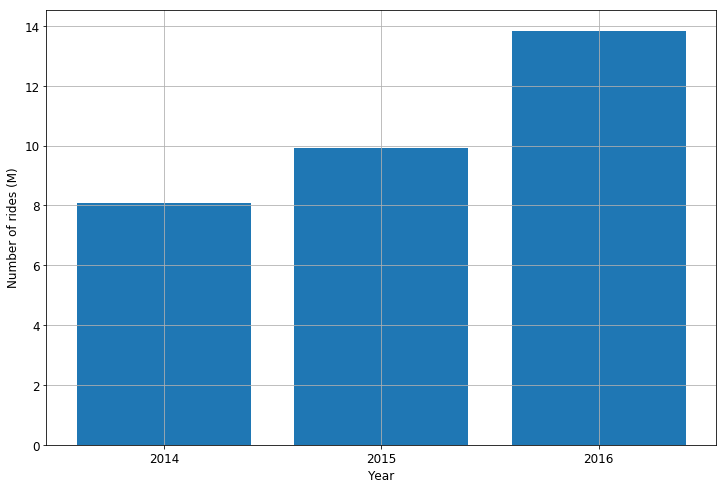

In [4]:
df_year.year = df_year.year.astype('int')
df_year = df_year[(df_year.year>2013) & (df_year.year<2017)]

plt.figure(figsize=(12,8))
plt.bar(df_year.year, df_year.Nrides/1e6)
#plt.scatter(df.year,df.Nrides)
plt.grid();
plt.gca().set_xticks([2014,2015,2016])
plt.xlabel('Year')
plt.ylabel('Number of rides (M)');

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_year.png')

## Plot the total number of rides per month, for each year
The plot below shows that there is a strong seasonal cycle, with more rides in the summer months. My hypothesis is that this is mainly driven by the temperature; I will get weather data later and test this.
- Looks like a big increase in magnitude in 2016. Did the number of stations or bikes increas a lot, or did the number of users increase??


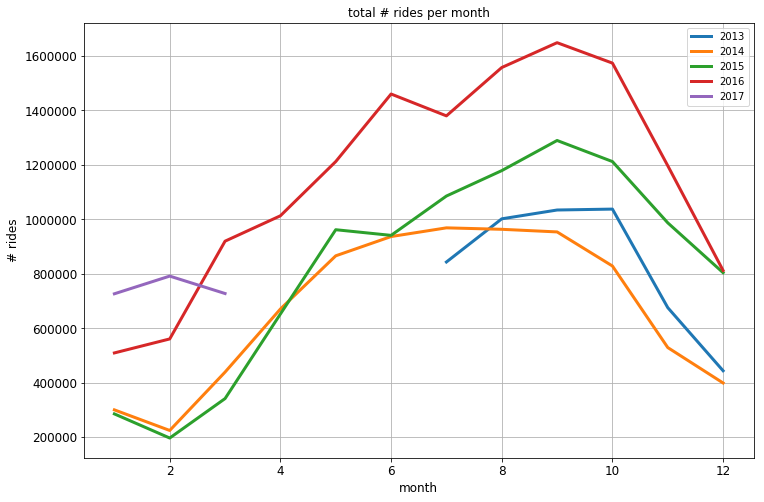

In [5]:
df = pd.read_csv("data/NRidesGroupedByYearMonth.csv")
#df.head()

plt.figure(figsize=(12,8))
for year in df.year.unique():
    plt.plot(df.month[df.year==year],df.Nrides[df.year==year], label=str(year))
    plt.legend();
plt.grid()
plt.xlabel('month')
plt.ylabel('# rides')

plt.title('total # rides per month')

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_month.png')

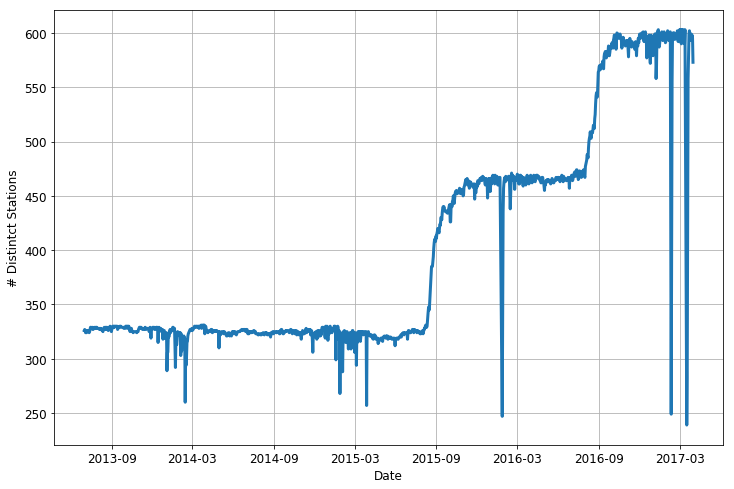

In [6]:
df = pd.read_csv('data/NDistinctStationsGroupedByDate.csv')
df.date = pd.to_datetime(df.date)

plt.figure(figsize=(12,8))
plt.plot(df.date,df.N_stations);
plt.grid()
plt.xlabel('Date')
plt.ylabel('# Distintct Stations');

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/stations_vs_time.png')

## Number of rides vs day of week. 0 is Monday, 6 is Sunday. 
- There are significanlty less rides on the weekend. 


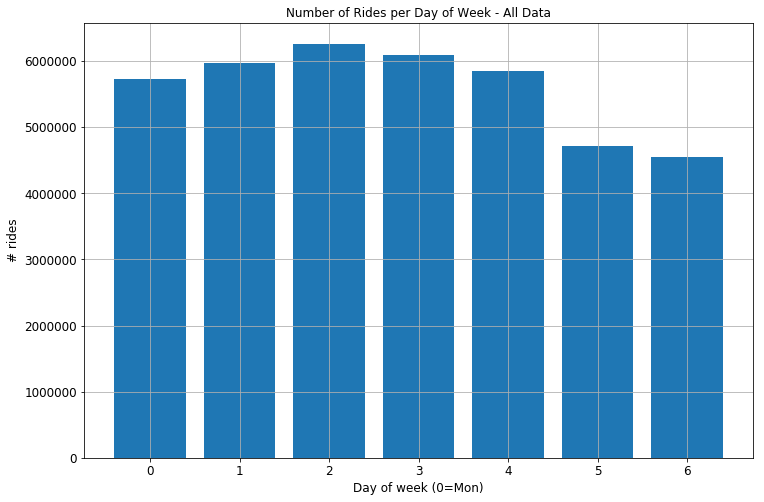

In [7]:

# load saved query results
df_wkday = pd.read_csv('data/NridesGroupedByWkday.csv')
#df_wkday.head()

plt.figure(figsize=(12,8))
plt.bar(df_wkday.wkday,df_wkday.Nrides)
plt.grid()
plt.xlabel('Day of week (0=Mon)')
plt.ylabel('# rides')
plt.title('Number of Rides per Day of Week - All Data')

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_dayofweek.png')

## Number of rides per day. 
This shows that there is a strong seasonal pattern, but also some big residuals from that pattern. These could be days that were unseasonably cold/warm, or due to other factors. 

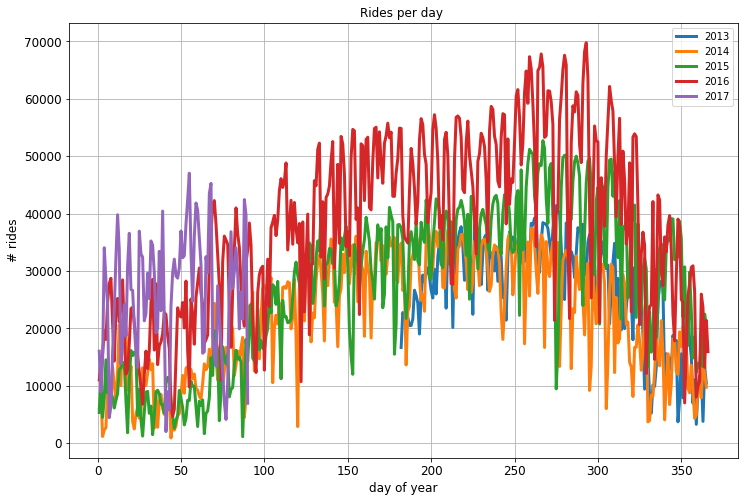

In [25]:
# for all years
#years = [2013, 2014, 2015, 2016, 2017]
#query = ('SELECT yday, COUNT(*) as num_rides FROM rides WHERE year=? GROUP BY yday')

#for year in years:
#    df = pd.read_sql_query(query, con, params=[year] )
#    plt.plot(df.yday, df.num_rides, label=str(year) )


df = pd.read_csv('data/TotalRidesGroupedByDate.csv')
#df.head()

plt.figure(figsize=(12,8))
for year in df.year.unique():
    plt.plot(df.yday[df.year==year],df.Nrides[df.year==year],label=str(year))

plt.grid()
plt.xlabel('day of year')
plt.ylabel('# rides')
plt.title('Rides per day ')
plt.legend();

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_day.png')

## Number of rides by hour. 
- There are two peaks - near 7-8am, and 17-18 pm, which probably correspond to people commuting during rush hour.
- This pattern is very similar each year

In [8]:
# For ONE year
year = 2014
#df_hr = pd.read_sql_query("SELECT hour,COUNT(*) as num_rides FROM rides WHERE year=? GROUP BY hour",con,params=[year])

df_hr = pd.read_csv('data/TotalRidesGroupedByHour.csv')
df_hr.head()

#plt.plot(df_hr.hour[df.year==year],df_hr.Nrides[df.year==year])
#plt.grid()
#plt.xlabel('hour of day')
#plt.ylabel('# rides')
#plt.title('Rides per hour for ' + str(year) )

,hour,Nrides
0,0,372641
1,1,207887
2,2,123097
3,3,76074
4,4,71280


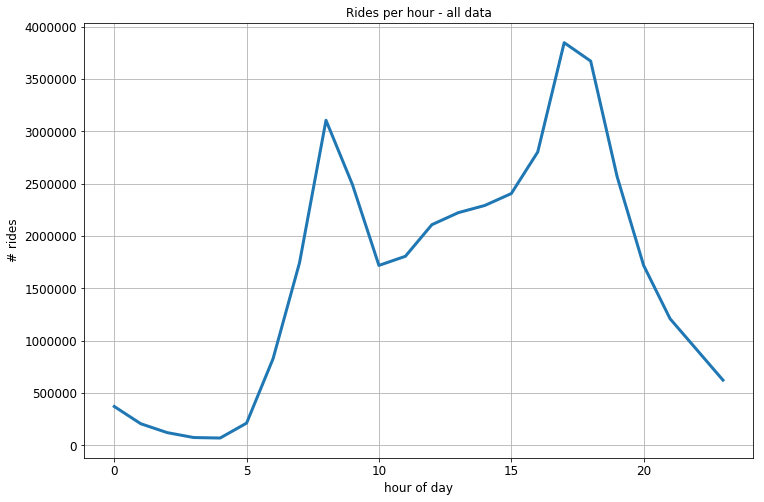

In [8]:
# For all years
#years = [2014, 2015, 2016]
#query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? GROUP BY hour')

#for year in years:
#    df_hr = pd.read_sql_query(query, con, params=[year])
#    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

df_hr = pd.read_csv('data/TotalRidesGroupedByHour.csv')
df_hr.head()
 
plt.figure(figsize=(12,8))
plt.plot(df_hr.hour, df_hr.Nrides)
plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - all data')
#plt.legend();

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_hour.png')

## Plot vs hour, but separate weekdays/weekends
- Weekdays: rush hour
- weekends: people sleep in, ride throughout the day

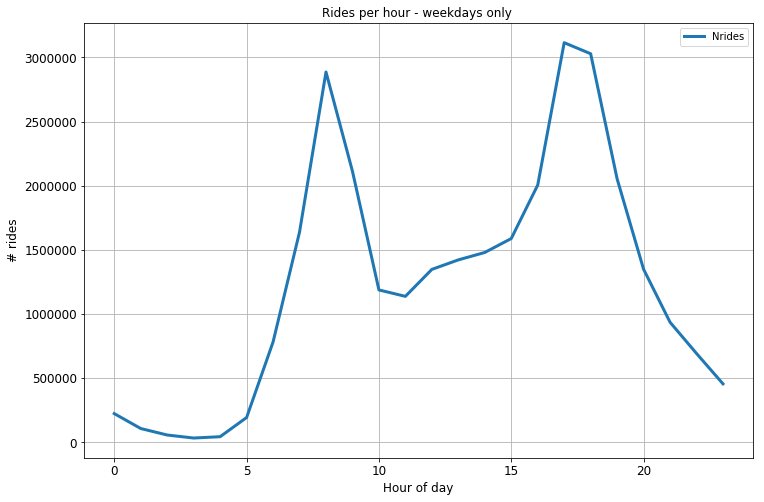

In [9]:
# weekdays

#years = [2014, 2015, 2016]
#query = ('SELECT hour, COUNT(*) as num_rides FROM rides WHERE year=? AND wkday<5 GROUP BY hour')

#for year in years:
#    df_hr = pd.read_sql_query(query, con, params=[year])
#    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

df_hr = pd.read_csv('data/NridesGroupedByHourWeekdays.csv')    

plt.figure(figsize=(12,8))
plt.plot(df_hr.hour,df_hr.Nrides)
plt.grid()
plt.xlabel('Hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekdays only ')
plt.legend();

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_hour_weekdays.png')

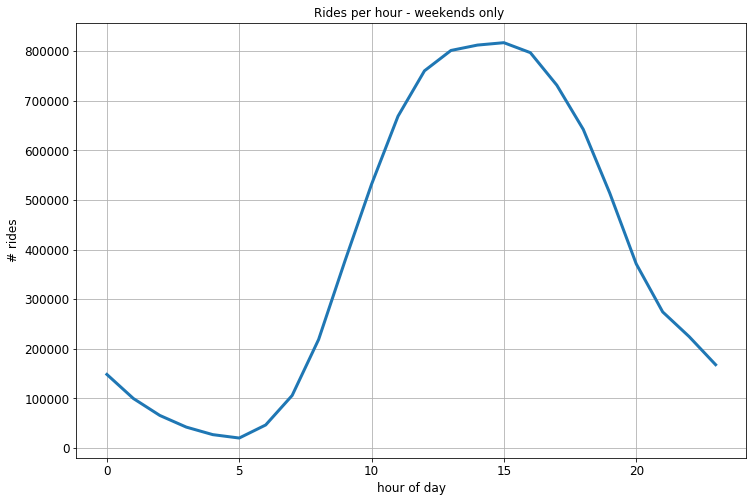

In [10]:
# weekends

#years = [2014, 2015, 2016]
#query = ('SELECT hour,COUNT(*) as num_rides FROM rides WHERE year=? AND wkday>4 GROUP BY hour')

#for year in years:
#    df_hr = pd.read_sql_query(query, con, params=[year])
#    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

df_hr = pd.read_csv('data/NridesGroupedByHourWeekends.csv')    

plt.figure(figsize=(12,8))
plt.plot(df_hr.hour,df_hr.Nrides)
plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekends only ');
#plt.legend();

plt.savefig('/Users/Andy/andypicke.github.io/images/Citibike/rides_per_hour_weekend.png')

## Trip duration vs day of week
- Trips tend to be longer on weekends

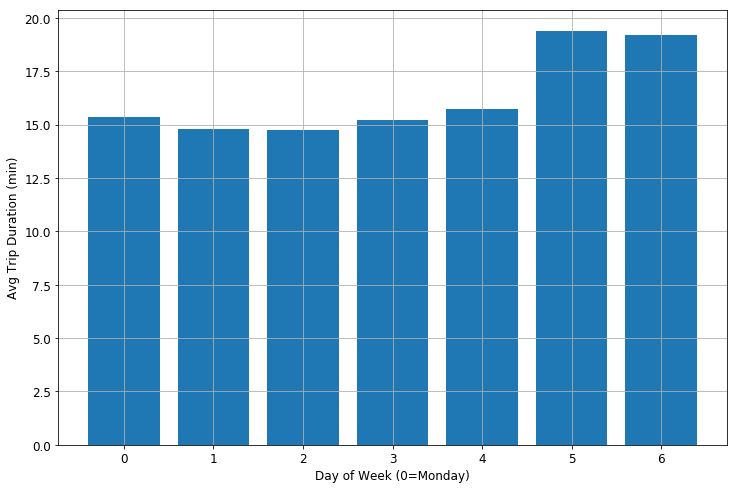

In [11]:
#query = 'SELECT AVG(tripduration) as dur, wkday  FROM rides WHERE year=2015 GROUP BY wkday'
#df = pd.read_sql_query(query,con)


df = pd.read_csv('data/AvgDurationGroupedByWkday.csv')
#df.head()

plt.figure(figsize=(12,8))
plt.bar(df.wkday,df.dur/60)
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Avg Trip Duration (min)')
plt.grid();

## Rides per station.
- Stations change/move/open/close over time, so this might be tricky.
- Definitely few outliers with way more rides than most. Are these near transportation hubs? Do they have more bikes available? Have they been around longer?

How many trips start and end at same station?

## Separate weekday/weekends
- guess is that weekday rides will be more around transit stations etc.

### Duplicate stations?
There are some duplicates station ids in stations table, it looks like because the station location changed slightly or there are slight differences in the name?.

In [13]:
df_sta = pd.read_sql_query('SELECT DISTINCT * FROM stations ORDER BY id',con)
df2 = df_sta[df_sta.id==521].drop_duplicates()
df2

,id,name,lat,lon
333,521,8 Ave & W 31 St,40.750450,-73.994811
334,521,8 Ave & W 31 St,40.750967,-73.994442
335,521,8 Ave & W 31 St,40.750967,-73.994442
336,521,8 Ave & W 31 St N,40.750967,-73.994442


In [14]:
df2.iloc[2,:]==df2.iloc[1,:]

id       True
name     True
lat     False
lon     False
dtype: bool

In [15]:
# weekends
year=2015
query = "SELECT start_station_id, COUNT(*) as num_rides FROM rides WHERE year=? and wkday>4 GROUP BY start_station_id ORDER BY num_rides DESC"
df_wkend = pd.read_sql_query(query,con, params=[year])
df_wkend.head(10)



,start_station_id,num_rides
0,426,24456
1,497,22198
2,2006,22114
3,293,21978
4,435,21182
5,499,20215
6,285,19678
7,151,19178
8,368,18964
9,387,17988


In [16]:
# weekdays
year=2015
query = "SELECT start_station_id, COUNT(*) as num_rides FROM rides WHERE year=? and wkday<5 GROUP BY start_station_id ORDER BY num_rides DESC"
df_wkday = pd.read_sql_query(query,con, params=[year])
df_wkday.head(10)

,start_station_id,num_rides
0,519,94035
1,521,89372
2,293,73912
3,435,65967
4,497,63910
5,477,56015
6,426,54605
7,490,54202
8,285,54004
9,529,53006


In [17]:
df_sta = pd.read_sql_query('SELECT DISTINCT * FROM stations ORDER BY id',con)
df_sta.drop_duplicates(['id'],inplace=True)
df_merge = pd.merge(df_wkend,df_sta,left_on='start_station_id',right_on='id')
df_merge.head(10)

,start_station_id,num_rides,id,name,lat,lon
0,426,24456,426,West St & Chambers St,40.717548,-74.013221
1,497,22198,497,E 17 St & Broadway,40.737050,-73.990093
2,2006,22114,2006,Central Park S & 6 Ave,40.765909,-73.976342
3,293,21978,293,Lafayette St & E 8 St,40.730287,-73.990765
4,435,21182,435,W 21 St & 6 Ave,40.741740,-73.994156
5,499,20215,499,Broadway & W 60 St,40.769155,-73.981918
6,285,19678,285,Broadway & E 14 St,40.734546,-73.990741
7,151,19178,151,Cleveland Pl & Spring St,40.721816,-73.997203
8,368,18964,368,Carmine St & 6 Ave,40.730386,-74.002150
9,387,17988,387,Centre St & Chambers St,40.712733,-74.004607


### Plot maps showing most used stations on weekdays, weekends
- On weekdays, a lot of most used stations are near transit hubs like Penn Station and Grand Central.
- On weekends, a lot of most used stations are near Central Park.
- This is consistent with Citibike being used mainly for commuting during the week, and for recreation on weekends.

In [18]:

station_info = pd.read_sql_query('SELECT * FROM stations',con)
station_info.drop_duplicates(['id'],inplace=True)
station_info.head()

df_wkday_comb = pd.merge(df_wkday,station_info,left_on='start_station_id',right_on='id')
df_wkend_comb = pd.merge(df_wkend,station_info,left_on='start_station_id',right_on='id')
df_wkday_comb.head()


,start_station_id,num_rides,id,name,lat,lon
0,519,94035,519,Pershing Square N,40.751884,-73.977702
1,521,89372,521,8 Ave & W 31 St,40.750450,-73.994811
2,293,73912,293,Lafayette St & E 8 St,40.730287,-73.990765
3,435,65967,435,W 21 St & 6 Ave,40.741740,-73.994156
4,497,63910,497,E 17 St & Broadway,40.737050,-73.990093


In [19]:
import folium

map_wkday = folium.Map(location=[40.73, -73.97],zoom_start=12)
map_wkday

# Plot top 20
Nsta = 20
lat_list = df_wkday_comb.lat[0:Nsta]
lon_list = df_wkday_comb.lon[0::Nsta]
names = df_wkday_comb.name[0:Nsta]
N = df_wkend_comb.num_rides[0:Nsta]

# add station locations:
for lat, lon, name, N in zip(lat_list, lon_list, names, N):
#   folium.Marker([lat, lon], popup=name).add_to(map_osm)
    folium.CircleMarker([lat, lon], popup = name, radius=N/1000, fill_opacity=0.2,fill_color='grey', color='grey' ).add_to(map_wkday)
map_wkday


In [20]:

map_wkend = folium.Map(location=[40.73, -73.97],zoom_start=12)
map_wkend
lat_list = df_wkend_comb.lat[0:Nsta]
lon_list = df_wkend_comb.lon[0:Nsta]
names = df_wkend_comb.name[0:Nsta]
N=df_wkend_comb.num_rides[0:Nsta]
# add station locations:
for lat, lon, name, N in zip(lat_list, lon_list, names, N):
    #print(lat,lon,name)
#   folium.Marker([lat, lon], popup=name).add_to(map_osm)
    folium.CircleMarker([lat, lon], popup=name, radius=N/1000, fill_opacity=0.2,fill_color='blue', color='grey' ).add_to(map_wkend)
map_wkend

## Number of unique stations per year or month? 

- See when number of stations changed; this could effect number of rides
- Need to account for changing # stations, or just build model using a period where it didn't change?

In [21]:
#df_stat = pd.DataFrame(columns=['year','month','nrows'])
#df_stat = pd.DataFrame(['year','month','nrows'])

#month = 1
#year = 2015
#query = 'SELECT DISTINCT year, month, start_station_id FROM rides WHERE year=? AND month=? '

#for year in [2014,2015,2016]:
#    for month in range(1,13):
#        df = pd.read_sql_query(query, con, params=[year,month])
#        newdf = pd.DataFrame({'year':[year],'month':[int(month)],'nrows':[int(len(df))]})
#        df_stat = df_stat.append(newdf,ignore_index=True)
#df_stat.head()

In [22]:
#plt.plot(df_stat.nrows)
#plt.grid() ;
#plt.ylabel('# Stations') ;
#plt.xlabel('months since Jan 2016') ;
# add lines to separate years
#plt.vlines(12,300,600)
#plt.vlines(24,300,600)
#plt.vlines(36,300,600)


## Look at number of unique bikes in each complete year.
Are more bikes being added? Could this affect the number of rides taken?

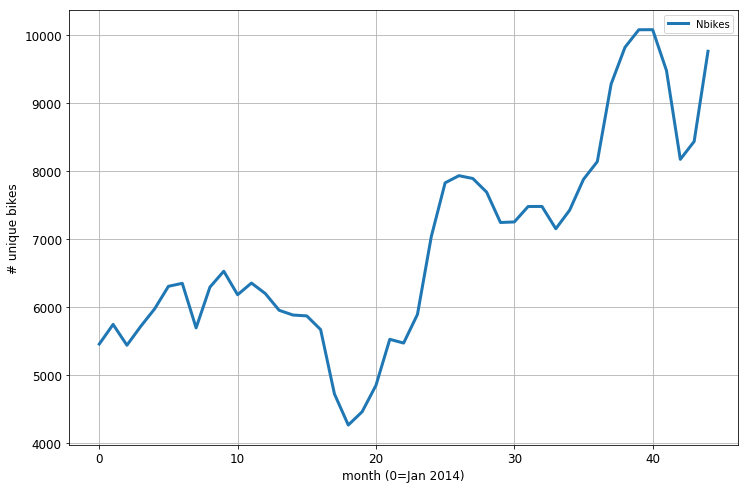

In [12]:

df = pd.read_csv('data/NdistinctBikesGroupedByYearMonth.csv')

# Plot # of unique bikes over time
#for year in unqiue(df.year):
plt.figure(figsize=(12,8))
plt.plot(df.Nbikes)
plt.grid()
plt.xlabel('month (0=Jan 2014)')
plt.ylabel('# unique bikes')
plt.legend();
